# Credit EDA Case Study


In [91]:
#import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline 

#To view all the coulmns while loading/viewing the data
pd.set_option('display.max_columns', None)

In [92]:
import os, fnmatch
path="C:\\Users\\Admin\\Downloads\\Credit EDA Case Study\\Credit EDA Case Study"

# loaded the application data
app_data = pd.read_csv(path+"\\application_data.csv")

# loaded the previous application data
pre_data = pd.read_csv(path+"\\previous_application.csv")


In [93]:
#check if the data is loaded properly or no 
app_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [94]:
# check the basic stat parameter for each coulumns via running the describe function
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [95]:
#check if the data is loaded properly or no ?
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# check the basic parameter for each coulumns via running the describe function
pre_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [97]:
# shape of both application previuos application data
print('Application data shape:',app_data.shape)
print('Previous Application data shape:',pre_data.shape)

Application data shape: (307511, 122)
Previous Application data shape: (1670214, 37)


In [98]:
# examin missing values and its percent 
def missing_vals(app_data):
    mis_val=app_data.isnull().sum()
    mis_per=100*mis_val/len(app_data)
    mis_table=pd.concat([mis_val,mis_per],axis=1)
    mis_table=mis_table.rename(columns={0:'Missing Values Count',1:'Missing Percent'})
    mis_table=mis_table[mis_table.iloc[:,1] != 0].sort_values('Missing Percent',ascending=False).round(1)
    #mis_table=mis_table.sort_values('Missing Percent',ascending=False).round(1)
    return mis_table
    #print(mis_table)
missing_vals(app_data).head(20)

,Missing Values Count,Missing Percent
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


#### As we can see this Max. 70 percent of data for several coulmn is missing

#### We will drop coulmn having more than 50 percent of data is missing

#### Before doing this let see the shape of the app_data

In [99]:
# shape of app_data
print(app_data.shape)

(307511, 122)


In [100]:
# We will drop coulmn having more than 50 percent of data is missing

app_data = app_data.loc[:, app_data.isnull().mean() < .50]

In [101]:
# After doing this let  see the shape of the app_data

print(app_data.shape)


(307511, 81)


In [102]:
# lets check now the percentage of missing values in app_data
# calling my function for this to show
missing_vals(app_data).head(20)

,Missing Values Count,Missing Percent
FLOORSMAX_AVG,153020,49.8
FLOORSMAX_MODE,153020,49.8
FLOORSMAX_MEDI,153020,49.8
YEARS_BEGINEXPLUATATION_AVG,150007,48.8
YEARS_BEGINEXPLUATATION_MODE,150007,48.8
YEARS_BEGINEXPLUATATION_MEDI,150007,48.8
TOTALAREA_MODE,148431,48.3
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8


#### We will treat the null value where we can see the percentge of null value is less than 13.5 percent
#### Before doing this lets we will see the outliers/datatypecategorical or continious etc  and then decide what we can opt mode
#### median and mean

In [103]:
# datatype for culumns 
print(app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].dtypes)
print(app_data["AMT_REQ_CREDIT_BUREAU_QRT"].dtypes)
print(app_data["AMT_REQ_CREDIT_BUREAU_MON"].dtypes)
print(app_data["AMT_REQ_CREDIT_BUREAU_WEEK"].dtypes)
print(app_data["AMT_REQ_CREDIT_BUREAU_DAY"].dtypes)
print(app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].dtypes)

float64
float64
float64
float64
float64
float64


In [104]:
# Checking the percetile value for all the coulumns who has 13.5 percent missing value 

# As the data seem like gradully as then need to fill the null value with mean value

list1 = ["AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_YEAR"]
app_data[list1].describe(percentiles = [0.05, .10, .25,.5, .75, .90, .95, .99 ])

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.265474,0.006402,0.267395,0.034362,0.007000,1.899974
std,0.794056,0.083849,0.916002,0.204685,0.110757,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
90%,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000


##### As per the percentile value we can go to impute the null values with mean for each columns

In [105]:
# imputed the null value with mean 

for col in list1:
    app_data[col].fillna(app_data[col].mean(), inplace=True)


In [106]:
# lets check now the percentage of missing values in app_data
# calling my function for this to show
missing_vals(app_data).head(20)

,Missing Values Count,Missing Percent
FLOORSMAX_MODE,153020,49.8
FLOORSMAX_MEDI,153020,49.8
FLOORSMAX_AVG,153020,49.8
YEARS_BEGINEXPLUATATION_AVG,150007,48.8
YEARS_BEGINEXPLUATATION_MODE,150007,48.8
YEARS_BEGINEXPLUATATION_MEDI,150007,48.8
TOTALAREA_MODE,148431,48.3
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8


In [107]:
# Check the null value for the coulmns where we fill via mean

for col in list1:
    print(app_data[col].isnull().sum())

0
0
0
0
0
0


In [108]:
# Check the datatyoe of each coulumns 
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [109]:
# Now check the how many numeric value for each coulmns to decide the categorical and continious numerical coulmuns
# Unique values per column
app_data.nunique().sort_values()

FLAG_DOCUMENT_4                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_2                      2
FLAG_DOCUMENT_3                      2
FLAG_DOCUMENT_5                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_7                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

#### As can see the below columns has 2 unique value but its datatype is float64/int64 and but its a categorical data type so we will change the datatype to Oject

* TARGET
* FLAG_MOBIL
* FLAG_EMP_PHONE
* FLAG_WORK_PHONE
* FLAG_CONT_MOBILE
* FLAG_PHONE
* FLAG_EMAI

In [110]:
# Chnaged the datatype of columns from float to object)
app_data["TARGET"]=app_data["TARGET"].astype(object)
app_data["FLAG_MOBIL"]=app_data["FLAG_MOBIL"].astype(object)
app_data["FLAG_EMP_PHONE"]=app_data["FLAG_EMP_PHONE"].astype(object)
app_data["FLAG_WORK_PHONE"]=app_data["FLAG_WORK_PHONE"].astype(object)
app_data["FLAG_CONT_MOBILE"]=app_data["FLAG_CONT_MOBILE"].astype(object)
app_data["FLAG_PHONE"]=app_data["FLAG_PHONE"].astype(object)
app_data["FLAG_EMAIL"]=app_data["FLAG_EMAIL"].astype(object)

In [111]:
# Verify the datatyoe of coulumns where we have changed
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null object
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

# Outliers cheking and treatment 

{'whiskers': [<matplotlib.lines.Line2D at 0x16507e6ac18>,
 'caps': [<matplotlib.lines.Line2D at 0x16507e75e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x16507e6a128>],
 'medians': [<matplotlib.lines.Line2D at 0x16507e75ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x16507e75390>],
 'means': []}

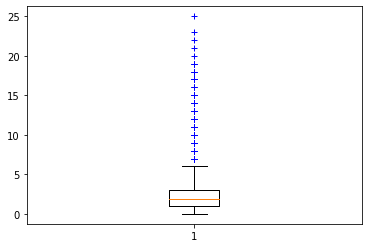

In [112]:
# Cheking for outliers on 'AMT_REQ_CREDIT_BUREAU_YEAR'
plt.boxplot(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'],sym = 'b+' )


{'whiskers': [<matplotlib.lines.Line2D at 0x16509da8780>,
 'caps': [<matplotlib.lines.Line2D at 0x1672dce52e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x16509da84a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1672dce5978>],
 'fliers': [],
 'means': []}

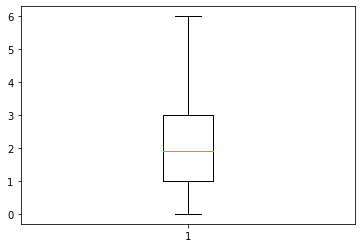

In [113]:
# if we remove the outliers and can see the box plot representation without outliers and can see how the boxplot is chnaged

plt.boxplot(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'],sym = '' )


{'whiskers': [<matplotlib.lines.Line2D at 0x16507def780>,
 'caps': [<matplotlib.lines.Line2D at 0x16509018a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x16507def0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x16509018d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x165090185c0>],
 'means': []}

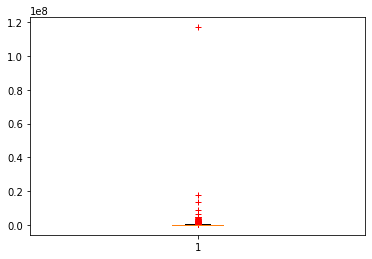

In [114]:
# Cheking for outliers on 'AMT_INCOME_TOTAL'
plt.boxplot(app_data['AMT_INCOME_TOTAL'],sym='r+')

{'whiskers': [<matplotlib.lines.Line2D at 0x1672dd0fc18>,
 'caps': [<matplotlib.lines.Line2D at 0x1672dd0ff28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1672dd0f828>],
 'medians': [<matplotlib.lines.Line2D at 0x1672dd039b0>],
 'fliers': [],
 'means': []}

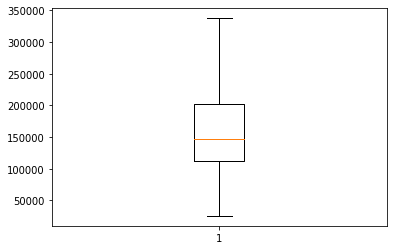

In [115]:
# if we remove the outliers and can see the box plot representation without outliers and can see how the boxplot is chnaged

plt.boxplot(app_data['AMT_INCOME_TOTAL'],sym='')


{'whiskers': [<matplotlib.lines.Line2D at 0x1672dce9978>,
 'caps': [<matplotlib.lines.Line2D at 0x1672dd0cef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1672dd0c668>],
 'medians': [<matplotlib.lines.Line2D at 0x165072f9828>],
 'fliers': [<matplotlib.lines.Line2D at 0x165072f9b70>],
 'means': []}

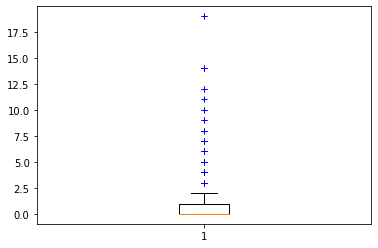

In [116]:
# Cheking for outliers on 'CNT_CHILDREN'

plt.boxplot(app_data['CNT_CHILDREN'],sym='b+')


{'whiskers': [<matplotlib.lines.Line2D at 0x16507851a90>,
 'caps': [<matplotlib.lines.Line2D at 0x16507840940>,
 'boxes': [<matplotlib.lines.Line2D at 0x16507851e10>],
 'medians': [<matplotlib.lines.Line2D at 0x16507840fd0>],
 'fliers': [],
 'means': []}

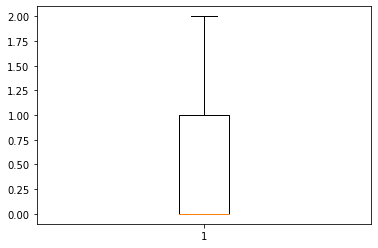

In [117]:
# if we remove the outliers and can see the box plot representation without outliers and can see how the boxplot is chnaged

plt.boxplot(app_data['CNT_CHILDREN'],sym='')

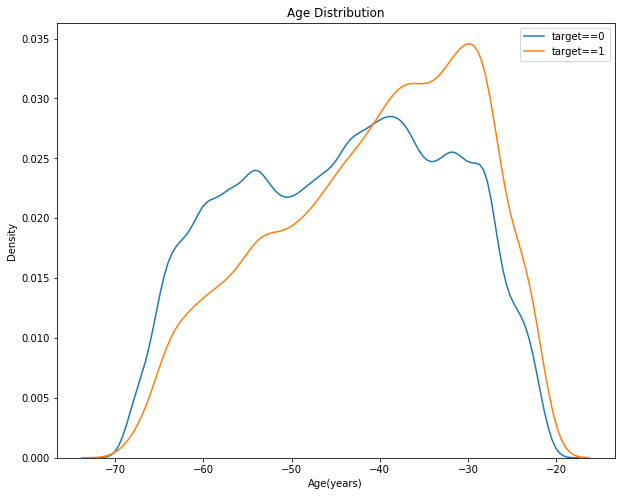

In [118]:
# Binning the continous variable and checking the status age and TARGET variation

plt.figure(figsize=(10,8))
sns.kdeplot(app_data.loc[app_data['TARGET']==0,'DAYS_BIRTH']/365,label='target==0')
sns.kdeplot(app_data.loc[app_data['TARGET']==1,'DAYS_BIRTH']/365,label='target==1')
plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Age distribution.png')

* As can see in graph that 35 to 28 age we have more density for target 1 and lower for target 0

* For 65 to 50 age density is higher as compare to target 1


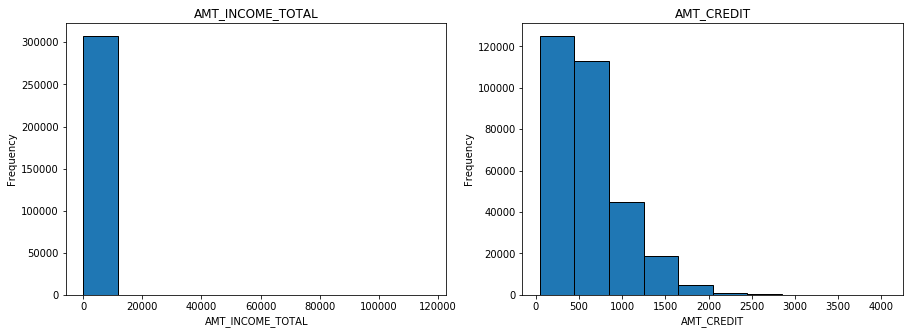

In [119]:
# hist plot for AMT_INCOME_TOTAL and AMT_CREDIT

features = ['AMT_INCOME_TOTAL','AMT_CREDIT']
plt.figure(figsize= (15,5))
for i in enumerate(features):
    plt.subplot(1,2,i[0]+1)
    plt.hist(app_data[i[1]]/1000,edgecolor = 'black')
    plt.xlabel(i[1])
    plt.ylabel('Frequency')
    plt.title(i[1])
    plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\AMT_INCOME_TOTAL and AMT_CREDIT Hist.png')

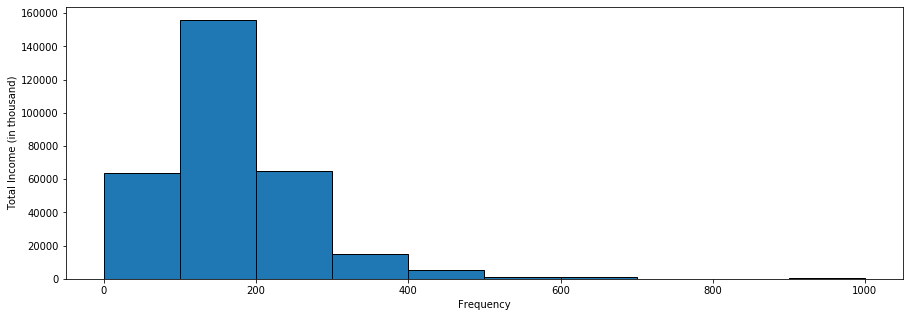

In [120]:
# hist plot for AMT_INCOME_TOTAL

plt.figure(figsize= (15,5))
plt.hist(app_data.AMT_INCOME_TOTAL/1000, bins=10,range =[0,1000],align = 'mid', ec="black")
plt.ylabel('Total Income (in thousand)')
plt.xlabel('Frequency')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\AMT_INCOME_TOTAL Histogram.png')


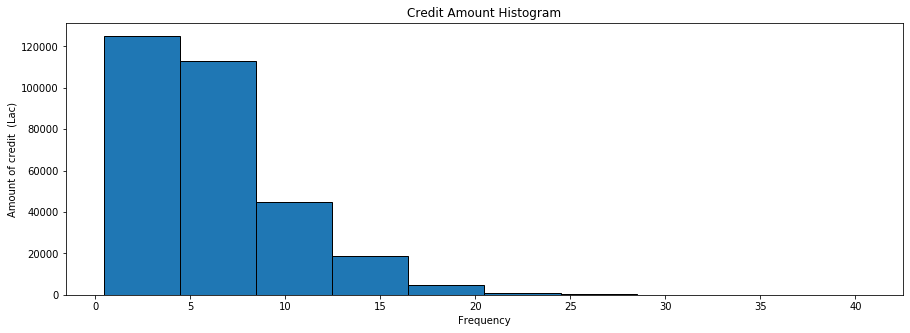

In [121]:
#plotting histogram on credit amount
plt.figure(figsize= (15,5))
plt.hist(x= app_data.AMT_CREDIT/100000, bins=10, align = 'mid', ec="black")
plt.ylabel('Amount of credit  (Lac)')
plt.xlabel('Frequency')
plt.title('Credit Amount Histogram')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Credit Amount Histogram.png')


# Data imbalance in the data

In [122]:
#part 2 slide #imbalance the data 

imb_TARGET = 100*app_data.TARGET.value_counts()/app_data.shape[0]
imb_EMAIL = 100*app_data.FLAG_EMAIL.value_counts()/app_data.shape[0]

In [123]:
# ratio for data imbalance
print(imb_TARGET)
print(imb_EMAIL)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64
0    94.328008
1     5.671992
Name: FLAG_EMAIL, dtype: float64


#### As can see the ratio for TARGET 0 and 1 is 92 % and 8%
#### for FLAG_EMAIL is 94 % and 6%

In [124]:
# Divide the data into two sets, i.e. Target=1 and Target=0

#Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

# T1 = 1 - client with payment difficulties

app_data_T1 = app_data[app_data['TARGET'] == 1]
        
# T1 = 0 - client with no payment difficultie
app_data_T0= app_data[app_data['TARGET'] == 0]

In [125]:
# data head view
app_data_T1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,-1038,1,1,0,1,0,0,NaN,1.0,2,2,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.432340,0.077499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-591.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,585000.0,Unaccompani

In [126]:
# data view
app_data_T0.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,1.000000,1.000000
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,0.000,0.000000,1.000000,1.000000,2

# Univariate analysis for categorical variables for both TARGET 0 and 1

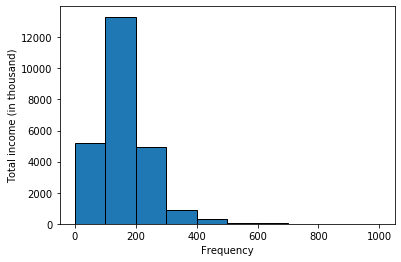

In [127]:
#Univariate analysis as for target=1 and then we are seeing the total income.

plt.hist(app_data_T1.AMT_INCOME_TOTAL/1000, bins=10 , range=[0,1000] ,align = 'mid', ec="black")
plt.ylabel('Total income (in thousand)')
plt.xlabel('Frequency')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\App Target-1 Total Income.png')

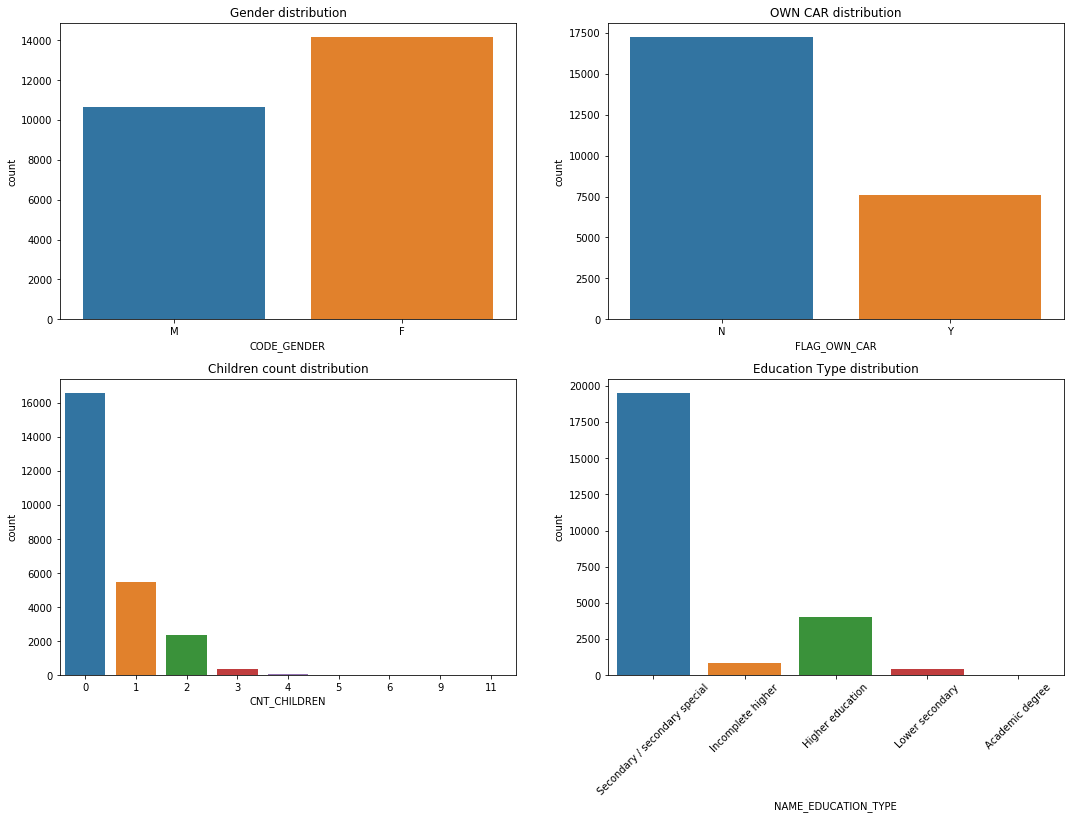

In [128]:
#Target 1 
# Univariate analysis for categorical variables for both TARGET 1

f,ax=plt.subplots(2,2,figsize=(18,12))
sns.countplot('CODE_GENDER',data=app_data_T1,ax=ax[0,0])
ax[0,0].set_title('Gender distribution')
sns.countplot('FLAG_OWN_CAR',data=app_data_T1,ax=ax[0,1])
ax[0,1].set_title('OWN CAR distribution')
sns.countplot('CNT_CHILDREN',data=app_data_T1,ax=ax[1,0])
ax[1,0].set_title('Children count distribution')
sns.countplot('NAME_EDUCATION_TYPE',data=app_data_T1,ax=ax[1,1])
ax[1,1].set_title("Education Type distribution")
plt.xticks(rotation = 45)
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Uni_Analysis for target 1.png')


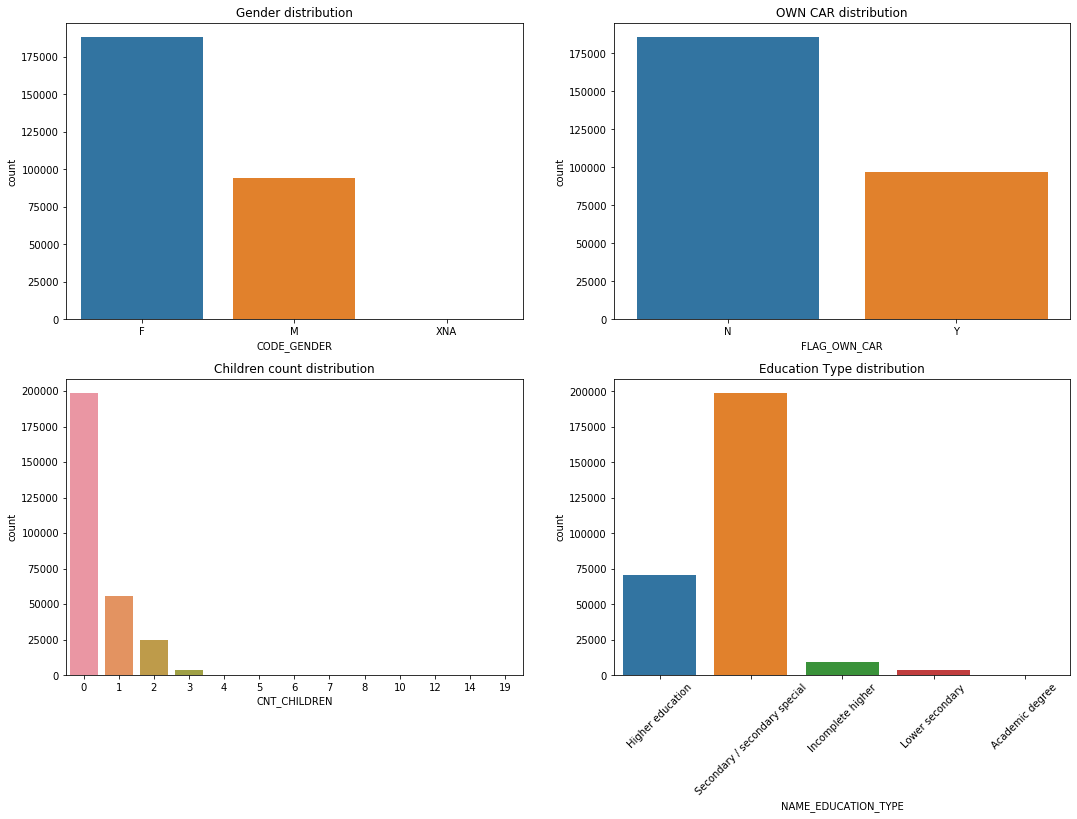

In [129]:
#Target 0
# Univariate analysis for categorical variables for both TARGET 0

f,ax=plt.subplots(2,2,figsize=(18,12))
sns.countplot('CODE_GENDER',data=app_data_T0,ax=ax[0,0])
ax[0,0].set_title('Gender distribution')
sns.countplot('FLAG_OWN_CAR',data=app_data_T0,ax=ax[0,1])
ax[0,1].set_title('OWN CAR distribution')
sns.countplot('CNT_CHILDREN',data=app_data_T0,ax=ax[1,0])
ax[1,0].set_title('Children count distribution')
sns.countplot('NAME_EDUCATION_TYPE',data=app_data_T0,ax=ax[1,1])
ax[1,1].set_title("Education Type distribution")
plt.xticks(rotation = 45)
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Uni_Analysis for target 0.png')

# Correlation

# TARGET 1 correlation

In [130]:
# correlation
num = ['int64','float64','int32']
corr_data_T1 = app_data_T1.select_dtypes(include = num)

In [131]:
corr_data_T1.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573.0,-1827,1.0,3,2,9,0,0,0,0,0,0,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,0,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482,-1262,-1182.0,-1029,2.0,2,2,9,0,0,0,0,0,0,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,0,135000.0,288873.0,16258.5,238500.0,0.007305,-13384,-3597,-45.0,-4409,2.0,3,3,11,0,0,0,0,0,0,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,0,81000.0,252000.0,14593.5,252000.0,0.028663,-24794,365243,-5391.0,-4199,2.0,2,2,10,0,0,0,0,0,0,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
#checked the datatypes and verified
corr_data_T1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 61 columns):
SK_ID_CURR                      24825 non-null int64
CNT_CHILDREN                    24825 non-null int64
AMT_INCOME_TOTAL                24825 non-null float64
AMT_CREDIT                      24825 non-null float64
AMT_ANNUITY                     24825 non-null float64
AMT_GOODS_PRICE                 24804 non-null float64
REGION_POPULATION_RELATIVE      24825 non-null float64
DAYS_BIRTH                      24825 non-null int64
DAYS_EMPLOYED                   24825 non-null int64
DAYS_REGISTRATION               24825 non-null float64
DAYS_ID_PUBLISH                 24825 non-null int64
CNT_FAM_MEMBERS                 24825 non-null float64
REGION_RATING_CLIENT            24825 non-null int64
REGION_RATING_CLIENT_W_CITY     24825 non-null int64
HOUR_APPR_PROCESS_START         24825 non-null int64
REG_REGION_NOT_LIVE_REGION      24825 non-null int64
REG_REGION_NOT_WORK_REGION  

In [133]:
# removed the FLAG_DOCUMENT which is not required 
corr_data_T1

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
26,100031,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573.0,-1827,1.0,3,2,9,0,0,0,0,0,0,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,2.000000,2.000000
40,100047,0,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482,-1262,-1182.0,-1029,2.0,2,2,9,0,0,0,0,0,0,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,2.000000,0.000000,4.000000
42,100049,0,135000.0,288873.0,16258.5,238500.0,0.007305,-13384,-3597,-45.0,-4409,2.0,3,3,11,0,0,0,0,0,0,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,2.000000
81,100096,0,81000.0,252000.0,14593.5,252000.0,0.028663,-24794,365243,-5391.0,-4199,2.0,2,2,10,0,0,0,0,0,0,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
94,100112,0,315000.0,953460.0,64107.0,900000.0,0.030755,-10199,-2015,-4802.0,-1038,1.0,2,2,13,0,0,0,0,1,1,0.432340,0.077499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-591.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,2.000000
110,100130,1,157500.0,723996.0,30802.5,585000.0,0.007274,-10526,-267,-387.0,-3190,2.0,2,2,12,0,1,1,0,1,1,0.282069,0.120641,0.9881,0.3333,0.9881,0.3333,0.9881,0.3333,0.1284,0.0,0.0,0.0,0.0,-56.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
138,100160,0,292500.0,675000.0,36747.0,675000.0,0.035792,-16667,-200,-5239.0,-114,2.0,2,2,18,1,1,0,1,1,0,0.631961,0.289611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
154,100181,0,157500.0,245619.0,12667.5,166500.0,0.022625,-17538,-7676,-774.0,-1082,1.0,2,2,9,0,0,0,0,0,0,0.182171,0.443615,0.9757,0.1667,0.9757,0.1667,0.9757,0.1667,0.0552,0.0,0.0,0.0,0.0,-216.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,6.000000
163,100192,0,111915.0,225000.0,21037.5,225000.0,0.018801,-7989,-150,-2570.0,-646,1.0,2,2,16,0,0,0,0,1,1,0.086253,0.513694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-122.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [134]:
corr_data_T1.drop('FLAG_DOCUMENT_2', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_3', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_4', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_5', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_6', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_7', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_8', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_9', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_10', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_11', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_12', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_13', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_14', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_15', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_16', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_17', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_18', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_19', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_20', axis = 1, inplace = True)
corr_data_T1.drop('FLAG_DOCUMENT_21', axis = 1, inplace = True)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [135]:
# re-vierified datatype for and now we will correlation
corr_data_T1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 41 columns):
SK_ID_CURR                      24825 non-null int64
CNT_CHILDREN                    24825 non-null int64
AMT_INCOME_TOTAL                24825 non-null float64
AMT_CREDIT                      24825 non-null float64
AMT_ANNUITY                     24825 non-null float64
AMT_GOODS_PRICE                 24804 non-null float64
REGION_POPULATION_RELATIVE      24825 non-null float64
DAYS_BIRTH                      24825 non-null int64
DAYS_EMPLOYED                   24825 non-null int64
DAYS_REGISTRATION               24825 non-null float64
DAYS_ID_PUBLISH                 24825 non-null int64
CNT_FAM_MEMBERS                 24825 non-null float64
REGION_RATING_CLIENT            24825 non-null int64
REGION_RATING_CLIENT_W_CITY     24825 non-null int64
HOUR_APPR_PROCESS_START         24825 non-null int64
REG_REGION_NOT_LIVE_REGION      24825 non-null int64
REG_REGION_NOT_WORK_REGION  

In [136]:
# two continous variable corr calculation
matrix_corr_data_T1 = corr_data_T1.corr()
matrix_corr_data_T1

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,-0.001254,-0.005151,0.006342,-0.002539,-0.003816,-0.005936,-0.004135,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,0.006452,-0.008178,0.005597,0.015976,0.007172,0.013810,0.006142,0.016045,0.006284,-0.009395,-0.005549,-0.009058,-0.009428,0.002455,-0.010956,-0.007256,-0.002734,0.005963,-0.000783,0.007970
CNT_CHILDREN,-0.005144,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,0.259109,-0.191942,0.149154,-0.032299,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.012260,-0.020268,0.004346,-0.020326,0.003981,-0.019678,0.004048,-0.019923,-0.016258,0.025804,0.001448,0.025180,-0.005106,0.011547,-0.000322,-0.011816,-0.010766,-0.011958,-0.016702,-0.031838
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,0.003096,-0.014979,0.000158,-0.004215,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,0.007154,-0.015110,0.001642,0.009801,0.001530,0.009299,0.001636,0.009652,0.006451,-0.004709,-0.005186,-0.004616,-0.004866,-0.002429,0.000672,-0.000219,0.000033,0.003823,-0.001178,0.002109
AMT_CREDIT,-0.001290,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,-0.135316,-0.000968,-0.025854,-0.052329,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.120848,0.077698,0.006840,0.090926,0.000958,0.088606,0.005950,0.090833,0.067370,0.019098,-0.025979,0.019487,-0.030880,-0.110851,-0.005382,0.002948,0.007030,0.049010,-0.016101,-0.031116
AMT_ANNUITY,-0.007578,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,-0.014303,-0.082552,0.034279,-0.016767,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.116305,0.041415,0.001732,0.107146,-0.002979,0.104314,0.001626,0.105975,0.073045,0.004463,-0.022394,0.005500,-0.027495,-0.079870,0.012637,-0.000221,0.028100,0.047772,-0.009214,-0.012141
AMT_GOODS_PRICE,-0.001816,-0.008112,0.037583,0.983103,0.752699,1.000000,0.076049,-0.135810,0.003587,-0.025679,-0.056086,0.047388,-0.066390,-0.077191,0.044315,0.022392,0.036261,0.035484,-0.034115,-0.038916,-0.016685,0.131184,0.078754,0.006178,0.097623,0.000319,0.095210,0.005336,0.097508,0.073896,0.019921,-0.021783,0.020385,-0.026179,-0.118303,-0.004021,0.004093,0.007315,0.052134,-0.014748,-0.033017
REGION_POPULATION_RELATIVE,0.006301,-0.031975,0.009135,0.069161,0.071690,0.076049,1.000000,-0.048190,0.015103,-0.056222,-0.015537,-0.030163,-0.443236,-0.446977,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.169751,-0.009810,-0.016963,0.261106,-0.017182,0.244463,-0.017148,0.255584,0.157830,0.006224,0.025865,0.006793,0.018231,-0.055139,-0.001098,-0.004886,0.002628,0.063914,-0.006614,0.000884
DAYS_BIRTH,-0.001254,0.259109,0.003096,-0.135316,-0.014303,-0.135810,-0.048190,1.000000,-0.575097,0.289114,0.252863,0.203267,0.033928,0.033631,0.062172,0.054654,0.069564,0.045517,0.161858,0.215192,0.123623,-0.108662,-0.171621,-0.005103,-0.030130,-0.003255,-0.029194,-0.005584,-0.029406,-0.018892,-0.005164,0.004946,-0.005

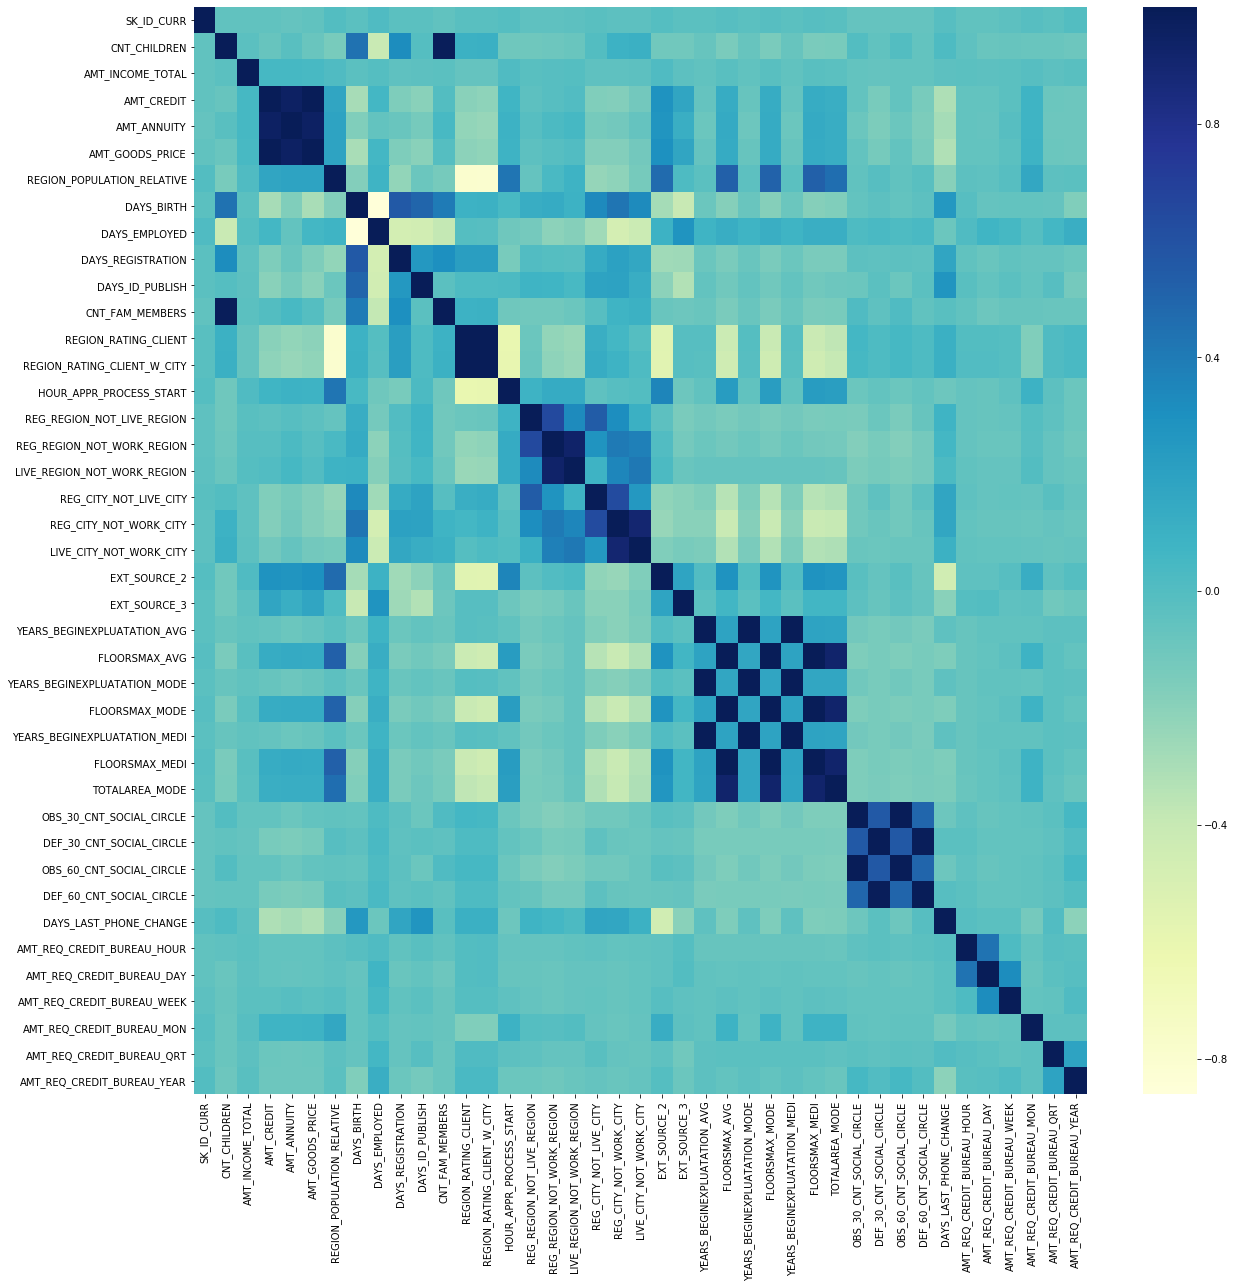

In [137]:
# HEAT MAP for the corr and we can see the color for visualize
plt.figure(figsize=(20,20))
sns.heatmap(matrix_corr_data_T1.corr(),annot=False,cmap="YlGnBu")
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Corr(Heatmap)for target 1.png')

In [138]:
# get a list highly correliated varaiable 
corr_T1= matrix_corr_data_T1.where(np.triu(np.ones(matrix_corr_data_T1.shape), k=1).astype(np.bool))
corr_T1

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,-0.001254,-0.005151,0.006342,-0.002539,-0.003816,-0.005936,-0.004135,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,0.006452,-0.008178,0.005597,0.015976,0.007172,0.013810,0.006142,0.016045,0.006284,-0.009395,-0.005549,-0.009058,-0.009428,0.002455,-0.010956,-0.007256,-0.002734,0.005963,-0.000783,0.007970
CNT_CHILDREN,NaN,NaN,0.004796,-0.001675,0.031257,-0.008112,-0.031975,0.259109,-0.191942,0.149154,-0.032299,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.012260,-0.020268,0.004346,-0.020326,0.003981,-0.019678,0.004048,-0.019923,-0.016258,0.025804,0.001448,0.025180,-0.005106,0.011547,-0.000322,-0.011816,-0.010766,-0.011958,-0.016702,-0.031838
AMT_INCOME_TOTAL,NaN,NaN,NaN,0.038131,0.046421,0.037583,0.009135,0.003096,-0.014979,0.000158,-0.004215,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,0.007154,-0.015110,0.001642,0.009801,0.001530,0.009299,0.001636,0.009652,0.006451,-0.004709,-0.005186,-0.004616,-0.004866,-0.002429,0.000672,-0.000219,0.000033,0.003823,-0.001178,0.002109
AMT_CREDIT,NaN,NaN,NaN,NaN,0.752195,0.983103,0.069161,-0.135316,-0.000968,-0.025854,-0.052329,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.120848,0.077698,0.006840,0.090926,0.000958,0.088606,0.005950,0.090833,0.067370,0.019098,-0.025979,0.019487,-0.030880,-0.110851,-0.005382,0.002948,0.007030,0.049010,-0.016101,-0.031116
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,0.752699,0.071690,-0.014303,-0.082552,0.034279,-0.016767,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.116305,0.041415,0.001732,0.107146,-0.002979,0.104314,0.001626,0.105975,0.073045,0.004463,-0.022394,0.005500,-0.027495,-0.079870,0.012637,-0.000221,0.028100,0.047772,-0.009214,-0.012141
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,0.076049,-0.135810,0.003587,-0.025679,-0.056086,0.047388,-0.066390,-0.077191,0.044315,0.022392,0.036261,0.035484,-0.034115,-0.038916,-0.016685,0.131184,0.078754,0.006178,0.097623,0.000319,0.095210,0.005336,0.097508,0.073896,0.019921,-0.021783,0.020385,-0.026179,-0.118303,-0.004021,0.004093,0.007315,0.052134,-0.014748,-0.033017
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.048190,0.015103,-0.056222,-0.015537,-0.030163,-0.443236,-0.446977,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.169751,-0.009810,-0.016963,0.261106,-0.017182,0.244463,-0.017148,0.255584,0.157830,0.006224,0.025865,0.006793,0.018231,-0.055139,-0.001098,-0.004886,0.002628,0.063914,-0.006614,0.000884
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.575097,0.289114,0.252863,0.203267,0.033928,0.033631,0.062172,0.054654,0.069564,0.045517,0.161858,0.215192,0.123623,-0.108662,-0.171621,-0.005103,-0.030130,-0.003255,-0.029194,-0.005584,-0.029406,-0.018892,-0.005164,0.004946,-0.005391,0.004001,0.111199,0.013105,-0.006699,-0.005027,-0.004114,-0.015300,-0.076893
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.188929,-0.226470,-0.186561,0.003679,0.002992,-0.059997,-0.0

In [139]:
# unstack the data and re-index the corr_T1
corr_T1_1 = corr_T1.abs().unstack().reset_index()

corr_T1_1

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,CNT_CHILDREN,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN
5,SK_ID_CURR,AMT_GOODS_PRICE,NaN
6,SK_ID_CURR,REGION_POPULATION_RELATIVE,NaN
7,SK_ID_CURR,DAYS_BIRTH,NaN
8,SK_ID_CURR,DAYS_EMPLOYED,NaN
9,SK_ID_CURR,DAYS_REGISTRATION,NaN


In [140]:
# Re-name the columns name
corr_T1_1.columns = ['Var1', 'Var2', 'Corr']

In [141]:
# drop the NaN value from the corr_T1_1 
corr_T1_1.dropna(subset = ['Corr'], inplace = True)

corr_T1_1

,Var1,Var2,Corr
41,CNT_CHILDREN,SK_ID_CURR,0.005144
82,AMT_INCOME_TOTAL,SK_ID_CURR,0.010165
83,AMT_INCOME_TOTAL,CNT_CHILDREN,0.004796
123,AMT_CREDIT,SK_ID_CURR,0.001290
124,AMT_CREDIT,CNT_CHILDREN,0.001675
125,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131
164,AMT_ANNUITY,SK_ID_CURR,0.007578
165,AMT_ANNUITY,CNT_CHILDREN,0.031257
166,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421
167,AMT_ANNUITY,AMT_CREDIT,0.752195


In [142]:
# Now sorted the data in ascending order to get the TOP 10 corr.
corr_T1_1.sort_values('Corr', ascending = False)

,Var1,Var2,Corr
1342,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
1172,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997187
1130,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.996124
1174,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.989195
1090,FLOORSMAX_MODE,FLOORSMAX_AVG,0.986594
208,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
1048,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.980466
1132,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.978073
545,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
452,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484


#  TOP 10 correlation for the TARGET 1

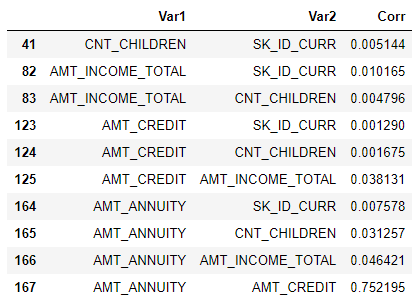


In [143]:
# TOP 10 correlation for the TARGET 1

corr_T1_1.head(10)

,Var1,Var2,Corr
41,CNT_CHILDREN,SK_ID_CURR,0.005144
82,AMT_INCOME_TOTAL,SK_ID_CURR,0.010165
83,AMT_INCOME_TOTAL,CNT_CHILDREN,0.004796
123,AMT_CREDIT,SK_ID_CURR,0.001290
124,AMT_CREDIT,CNT_CHILDREN,0.001675
125,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131
164,AMT_ANNUITY,SK_ID_CURR,0.007578
165,AMT_ANNUITY,CNT_CHILDREN,0.031257
166,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421
167,AMT_ANNUITY,AMT_CREDIT,0.752195


# TARGET 0 correlation


In [144]:
# correlation
num = ['int64','float64']
corr_data_T0 = app_data_T0.select_dtypes(include = num)
corr_data_T0.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
5,100008,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-477,2.0,2,2,16,0,0,0,0,0,0,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000,0.000000,0.000000,1.000000,1.000000


In [145]:
#check the datatypes and verified
corr_data_T0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 61 columns):
SK_ID_CURR                      282686 non-null int64
CNT_CHILDREN                    282686 non-null int64
AMT_INCOME_TOTAL                282686 non-null float64
AMT_CREDIT                      282686 non-null float64
AMT_ANNUITY                     282674 non-null float64
AMT_GOODS_PRICE                 282429 non-null float64
REGION_POPULATION_RELATIVE      282686 non-null float64
DAYS_BIRTH                      282686 non-null int64
DAYS_EMPLOYED                   282686 non-null int64
DAYS_REGISTRATION               282686 non-null float64
DAYS_ID_PUBLISH                 282686 non-null int64
CNT_FAM_MEMBERS                 282684 non-null float64
REGION_RATING_CLIENT            282686 non-null int64
REGION_RATING_CLIENT_W_CITY     282686 non-null int64
HOUR_APPR_PROCESS_START         282686 non-null int64
REG_REGION_NOT_LIVE_REGION      282686 non-null int64
REG_REGION_

In [146]:
# removed the FLAG_DOCUMENT which is not required as this is not relevant

corr_data_T0.drop('FLAG_DOCUMENT_2', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_3', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_4', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_5', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_6', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_7', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_8', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_9', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_10', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_11', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_12', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_13', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_14', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_15', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_16', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_17', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_18', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_19', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_20', axis = 1, inplace = True)
corr_data_T0.drop('FLAG_DOCUMENT_21', axis = 1, inplace = True)


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [147]:
# removed the FLAG_DOCUMENT which is not required 
# re-vierified datatype for and now we will correlation
corr_data_T0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 41 columns):
SK_ID_CURR                      282686 non-null int64
CNT_CHILDREN                    282686 non-null int64
AMT_INCOME_TOTAL                282686 non-null float64
AMT_CREDIT                      282686 non-null float64
AMT_ANNUITY                     282674 non-null float64
AMT_GOODS_PRICE                 282429 non-null float64
REGION_POPULATION_RELATIVE      282686 non-null float64
DAYS_BIRTH                      282686 non-null int64
DAYS_EMPLOYED                   282686 non-null int64
DAYS_REGISTRATION               282686 non-null float64
DAYS_ID_PUBLISH                 282686 non-null int64
CNT_FAM_MEMBERS                 282684 non-null float64
REGION_RATING_CLIENT            282686 non-null int64
REGION_RATING_CLIENT_W_CITY     282686 non-null int64
HOUR_APPR_PROCESS_START         282686 non-null int64
REG_REGION_NOT_LIVE_REGION      282686 non-null int64
REG_REGION_

In [148]:
# two continous variable
matrix_corr_data_T0 = corr_data_T0.corr()
matrix_corr_data_T0

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,-0.001346,0.001744,-0.001475,-0.000077,-0.002790,-0.000519,-0.000739,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,0.001589,0.000309,0.001202,0.004096,0.001442,0.003747,0.000952,0.003810,0.002040,-0.000695,0.000556,-0.000741,0.002382,-0.000998,-0.001751,-0.001607,0.002353,0.000049,0.001070,0.004055
CNT_CHILDREN,-0.000716,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,0.185792,-0.028751,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,-0.041729,0.007298,-0.008307,0.006545,-0.008199,0.006783,-0.008063,-0.006972,0.014471,-0.002246,0.014137,-0.002172,-0.008501,-0.000406,0.000601,-0.001530,-0.009765,-0.006633,-0.039888
AMT_INCOME_TOTAL,0.001739,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,0.064937,0.022896,0.034256,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.072401,0.016485,0.181891,0.015393,0.174416,0.016431,0.180458,0.125714,-0.027828,-0.027621,-0.027690,-0.027593,-0.041338,0.001225,0.006809,0.005406,0.053423,0.011406,0.025524
AMT_CREDIT,-0.000342,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515,0.013477,-0.001464,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,0.036085,0.005943,0.102921,0.004842,0.100024,0.005480,0.102374,0.072281,-0.000914,-0.019851,-0.000892,-0.022225,-0.069540,-0.003503,0.004118,-0.001768,0.050719,0.016656,-0.045879
AMT_ANNUITY,0.000068,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,-0.106425,0.039436,0.014113,0.075787,-0.132128,-0.145153,0.053589,0.041992,0.080665,0.075487,-0.005675,0.001520,0.010582,0.126615,0.028051,0.014059,0.130944,0.013588,0.127014,0.013679,0.129959,0.090966,-0.013091,-0.022535,-0.012893,-0.023385,-0.062013,0.002911,0.002209,0.011728,0.035328,0.010406,-0.010089
AMT_GOODS_PRICE,-0.000205,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,-0.044565,-0.071051,0.015916,-0.003649,0.062814,-0.104382,-0.112601,0.062766,0.026731,0.054922,0.054414,-0.024878,-0.016744,0.001310,0.135694,0.038908,0.006982,0.107686,0.005875,0.104693,0.006597,0.107089,0.076616,-0.000707,-0.021025,-0.000723,-0.023171,-0.071373,-0.002923,0.004504,-0.001498,0.052374,0.017024,-0.048111
REGION_POPULATION_RELATIVE,0.000360,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,-0.025244,-0.006961,-0.052083,-0.001071,-0.023425,-0.539005,-0.537301,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,0.198493,-0.012486,-0.006282,0.325347,-0.006421,0.306551,-0.006307,0.321077,0.203852,-0.012107,0.005941,-0.011591,0.002255,-0.041164,-0.002096,0.001826,-0.002295,0.072792,-0.000940,0.001661
DAYS_BIRTH,-0.001346,0.336966,0.062609,-0.047378,0.012263,-0.044565,-0.025244,1.000000,-0.618048,0.333151,0.271314,0.285825,0.002332,0.000780,0.095916,0.066252,0.097908,0.071648,0.179772,0.241904,0.160072,-0.078158,-0.197287,0.001982,0.007060,0.001730,0.006576,0.002093,0.007161,0.005098,0.007726,-0.003057,0.007316,-0.000990,0.076510,0.0

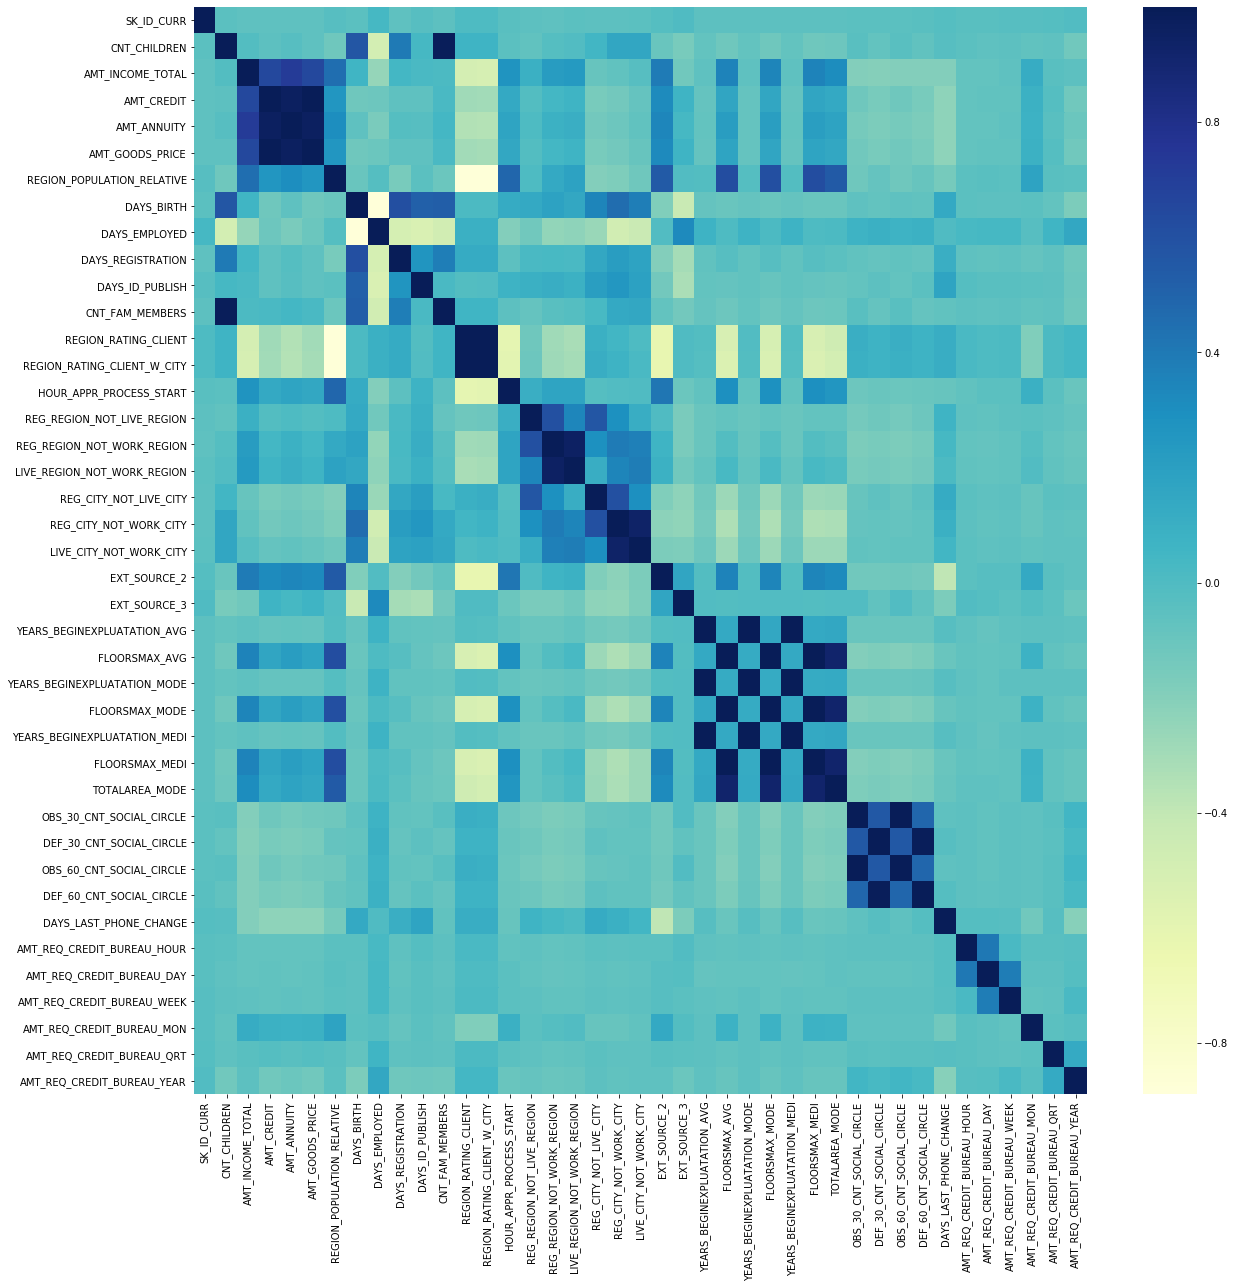

In [149]:
#HEAT MAP for the corr and we can see the color for visualize
plt.figure(figsize=(20,20))
sns.heatmap(matrix_corr_data_T0.corr(),annot=False,cmap="YlGnBu")
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Corr(Heatmap)for target 0.png')

In [150]:
# get a list highly correliated varaiable 
corr_T0= matrix_corr_data_T0.where(np.triu(np.ones(matrix_corr_data_T0.shape), k=1).astype(np.bool))
corr_T0

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,-0.001346,0.001744,-0.001475,-0.000077,-0.002790,-0.000519,-0.000739,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,0.001589,0.000309,0.001202,0.004096,0.001442,0.003747,0.000952,0.003810,0.002040,-0.000695,0.000556,-0.000741,0.002382,-0.000998,-0.001751,-0.001607,0.002353,0.000049,0.001070,0.004055
CNT_CHILDREN,NaN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,0.185792,-0.028751,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,-0.041729,0.007298,-0.008307,0.006545,-0.008199,0.006783,-0.008063,-0.006972,0.014471,-0.002246,0.014137,-0.002172,-0.008501,-0.000406,0.000601,-0.001530,-0.009765,-0.006633,-0.039888
AMT_INCOME_TOTAL,NaN,NaN,NaN,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,0.064937,0.022896,0.034256,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.072401,0.016485,0.181891,0.015393,0.174416,0.016431,0.180458,0.125714,-0.027828,-0.027621,-0.027690,-0.027593,-0.041338,0.001225,0.006809,0.005406,0.053423,0.011406,0.025524
AMT_CREDIT,NaN,NaN,NaN,NaN,0.771309,0.987250,0.100604,-0.047378,-0.072515,0.013477,-0.001464,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,0.036085,0.005943,0.102921,0.004842,0.100024,0.005480,0.102374,0.072281,-0.000914,-0.019851,-0.000892,-0.022225,-0.069540,-0.003503,0.004118,-0.001768,0.050719,0.016656,-0.045879
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,0.776686,0.120988,0.012263,-0.106425,0.039436,0.014113,0.075787,-0.132128,-0.145153,0.053589,0.041992,0.080665,0.075487,-0.005675,0.001520,0.010582,0.126615,0.028051,0.014059,0.130944,0.013588,0.127014,0.013679,0.129959,0.090966,-0.013091,-0.022535,-0.012893,-0.023385,-0.062013,0.002911,0.002209,0.011728,0.035328,0.010406,-0.010089
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,0.103827,-0.044565,-0.071051,0.015916,-0.003649,0.062814,-0.104382,-0.112601,0.062766,0.026731,0.054922,0.054414,-0.024878,-0.016744,0.001310,0.135694,0.038908,0.006982,0.107686,0.005875,0.104693,0.006597,0.107089,0.076616,-0.000707,-0.021025,-0.000723,-0.023171,-0.071373,-0.002923,0.004504,-0.001498,0.052374,0.017024,-0.048111
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.025244,-0.006961,-0.052083,-0.001071,-0.023425,-0.539005,-0.537301,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,0.198493,-0.012486,-0.006282,0.325347,-0.006421,0.306551,-0.006307,0.321077,0.203852,-0.012107,0.005941,-0.011591,0.002255,-0.041164,-0.002096,0.001826,-0.002295,0.072792,-0.000940,0.001661
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.618048,0.333151,0.271314,0.285825,0.002332,0.000780,0.095916,0.066252,0.097908,0.071648,0.179772,0.241904,0.160072,-0.078158,-0.197287,0.001982,0.007060,0.001730,0.006576,0.002093,0.007161,0.005098,0.007726,-0.003057,0.007316,-0.000990,0.076510,0.004109,0.002562,-0.000980,0.002572,-0.010438,-0.066972
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.210187,-0.274290,-0.237413,0.037851,0.040028,-0.094844,-0.035854,-0.108539,-0.0970

In [151]:
# unstack the data and re-index the corr_T0
corr_T0_0 = corr_T0.abs().unstack().reset_index()

corr_T0_0

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,CNT_CHILDREN,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT,NaN
4,SK_ID_CURR,AMT_ANNUITY,NaN
5,SK_ID_CURR,AMT_GOODS_PRICE,NaN
6,SK_ID_CURR,REGION_POPULATION_RELATIVE,NaN
7,SK_ID_CURR,DAYS_BIRTH,NaN
8,SK_ID_CURR,DAYS_EMPLOYED,NaN
9,SK_ID_CURR,DAYS_REGISTRATION,NaN


In [152]:
# Re-name the columns name
corr_T0_0.columns = ['Var1', 'Var2', 'Corr']

In [153]:
# drop the NaN value from the corr_T1_0
corr_T0_0.dropna(subset = ['Corr'], inplace = True)

corr_T0_0

,Var1,Var2,Corr
41,CNT_CHILDREN,SK_ID_CURR,0.000716
82,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
83,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027397
123,AMT_CREDIT,SK_ID_CURR,0.000342
124,AMT_CREDIT,CNT_CHILDREN,0.003081
125,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
164,AMT_ANNUITY,SK_ID_CURR,0.000068
165,AMT_ANNUITY,CNT_CHILDREN,0.020905
166,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
167,AMT_ANNUITY,AMT_CREDIT,0.771309


In [154]:
# Now sorted the data in ascending order to get the TOP 10 corr.
corr_T0_0.sort_values('Corr', ascending = False)


,Var1,Var2,Corr
1342,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
1172,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997018
1130,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.993582
1174,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.988153
208,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
1090,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985603
1048,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.971032
1132,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.962064
545,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
452,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571


In [155]:
# TOP 10 correlation for the TARGET 0

corr_T0_0.head(10)

,Var1,Var2,Corr
41,CNT_CHILDREN,SK_ID_CURR,0.000716
82,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
83,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027397
123,AMT_CREDIT,SK_ID_CURR,0.000342
124,AMT_CREDIT,CNT_CHILDREN,0.003081
125,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
164,AMT_ANNUITY,SK_ID_CURR,0.000068
165,AMT_ANNUITY,CNT_CHILDREN,0.020905
166,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
167,AMT_ANNUITY,AMT_CREDIT,0.771309


#  TOP 10 correlation for the TARGET 0

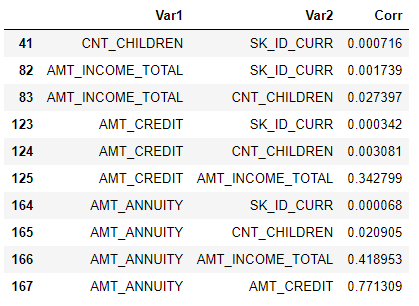

# Univariate and Bivariate analysis for numerical variables for both 0 and 1.


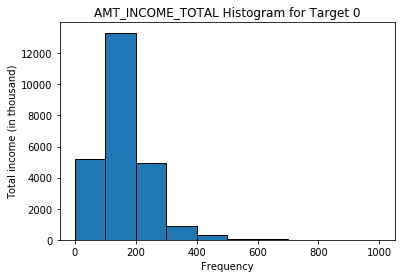

In [156]:
# univariate analysis- we are seeing the total income of population with target 1

plt.hist(app_data_T1.AMT_INCOME_TOTAL/1000, bins=10 , range=[0,1000] ,align = 'mid', ec="black")

plt.ylabel('Total income (in thousand)')
plt.xlabel('Frequency')
plt.title('AMT_INCOME_TOTAL Histogram for Target 0')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Uni_Analysis for Target 1- AMT_INCOME_TOTAL .png')


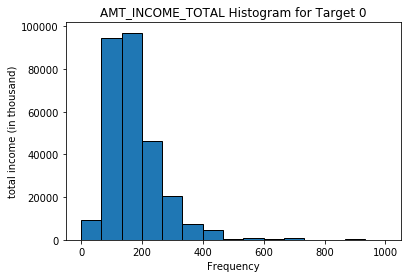

In [157]:
# univariate analysis- we are seeing the total income of population with target 0

plt.hist(app_data_T0.AMT_INCOME_TOTAL/1000, bins=15 , range=[0,1000] ,align = 'mid', ec="black")
plt.ylabel('total income (in thousand)')
plt.xlabel('Frequency')
plt.title('AMT_INCOME_TOTAL Histogram for Target 0')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Uni_Analysis for Target 0- AMT_INCOME_TOTAL .png')

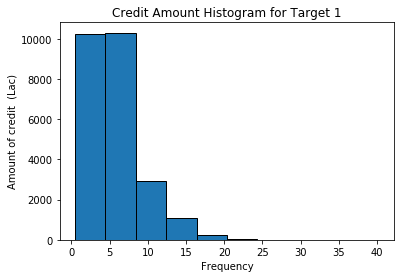

In [158]:
# for (app_data_T1 or target is 1)
#plotting histogram on credit amount 
plt.hist(app_data_T1.AMT_CREDIT/100000, bins=10, align = 'mid', ec="black")
plt.ylabel('Amount of credit  (Lac)')
plt.xlabel('Frequency')
plt.title('Credit Amount Histogram for Target 1')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Uni_Analysis for Target 1- AMT_CREDIT .png')

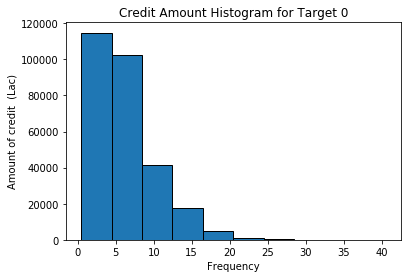

In [159]:
# for app_data_T0 or target is 0
#plotting histogram on credit amount

plt.hist(app_data_T0.AMT_CREDIT/100000, bins=10 ,align = 'mid', ec="black")
plt.ylabel('Amount of credit  (Lac)')
plt.xlabel('Frequency')
plt.title('Credit Amount Histogram for Target 0')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Uni_Analysis for Target 0- AMT_CREDIT .png')

#### Bi-variate Anaylsis 


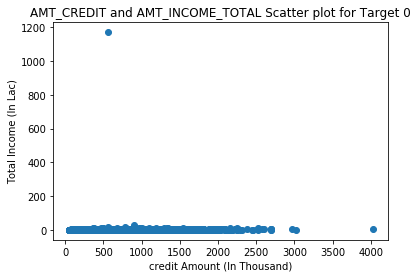

In [160]:
# now we will do bi-variate on the credit and income.

plt.scatter(app_data_T1["AMT_CREDIT"]/1000, app_data_T1["AMT_INCOME_TOTAL"]/100000)
plt.xlabel('credit Amount (In Thousand)')
plt.ylabel('Total Income (In Lac)')
plt.title('AMT_CREDIT and AMT_INCOME_TOTAL Scatter plot for Target 0')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Bi-varaite_Analysis for Target 1- AMT_CREDIT and AMT_INCOME_TOTAL .png')

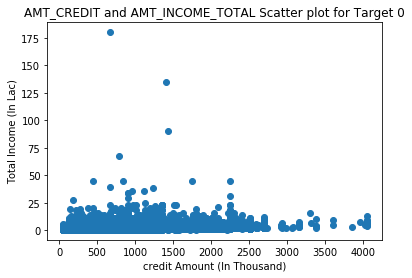

In [161]:
# now we will do bi-variate on the credit and income on TARGET0.

plt.scatter(app_data_T0["AMT_CREDIT"]/1000, app_data_T0["AMT_INCOME_TOTAL"]/100000)
plt.xlabel('credit Amount (In Thousand)')
plt.ylabel('Total Income (In Lac)')
plt.title('AMT_CREDIT and AMT_INCOME_TOTAL Scatter plot for Target 0')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Bi-varaite_Analysis for Target 0- AMT_CREDIT and AMT_INCOME_TOTAL .png')

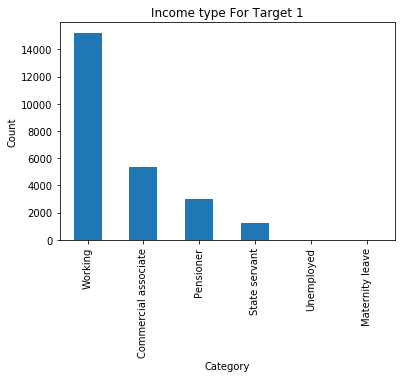

In [162]:
#now plotting graph frequncy of loan application with target =1

app_data_T1['NAME_INCOME_TYPE'].value_counts().plot('bar')
plt.title('Income type For Target 1')
plt.xlabel('Category')
plt.ylabel('Count')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\frequncy of loan application with target-1 .png')

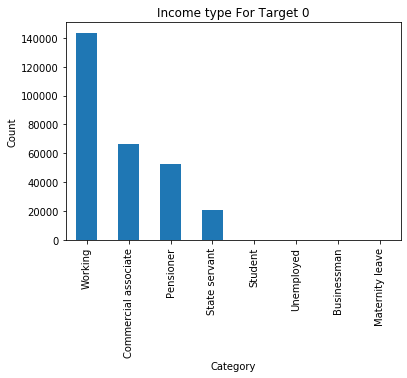

In [163]:
#now plotting graph frequncy of loan application with target 0

app_data_T0['NAME_INCOME_TYPE'].value_counts().plot('bar')
plt.title('Income type For Target 0')
plt.xlabel('Category')
plt.ylabel('Count')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\frequncy of loan application with target-0 .png')

In [164]:
# As per the graph we can see the maximum loan with working  

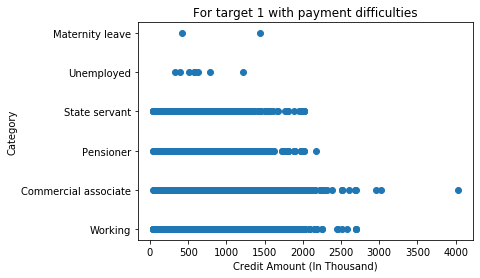

In [165]:
#This is Bivariate analysis for target 1 , having diffculty

plt.scatter(app_data_T1["AMT_CREDIT"]/1000, app_data_T1['NAME_INCOME_TYPE'])
plt.xlabel('Credit Amount (In Thousand)')
plt.ylabel('Category')
plt.title('For target 1 with payment difficulties')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Bivariate analysis for target= 1 with income type.png')

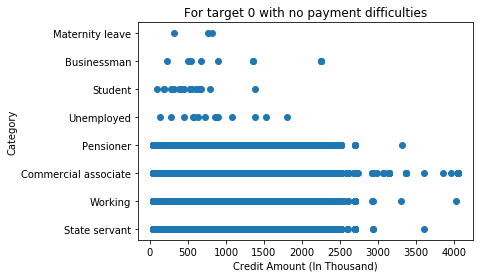

In [166]:
#This is Bivariate analysis for target 0 with no payment difficulties  

plt.scatter(app_data_T0["AMT_CREDIT"]/1000, app_data_T0['NAME_INCOME_TYPE'])
plt.xlabel('Credit Amount (In Thousand)')
plt.ylabel('Category')
plt.title('For target 0 with no payment difficulties')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Bivariate analysis for target= 0 with income type.png')

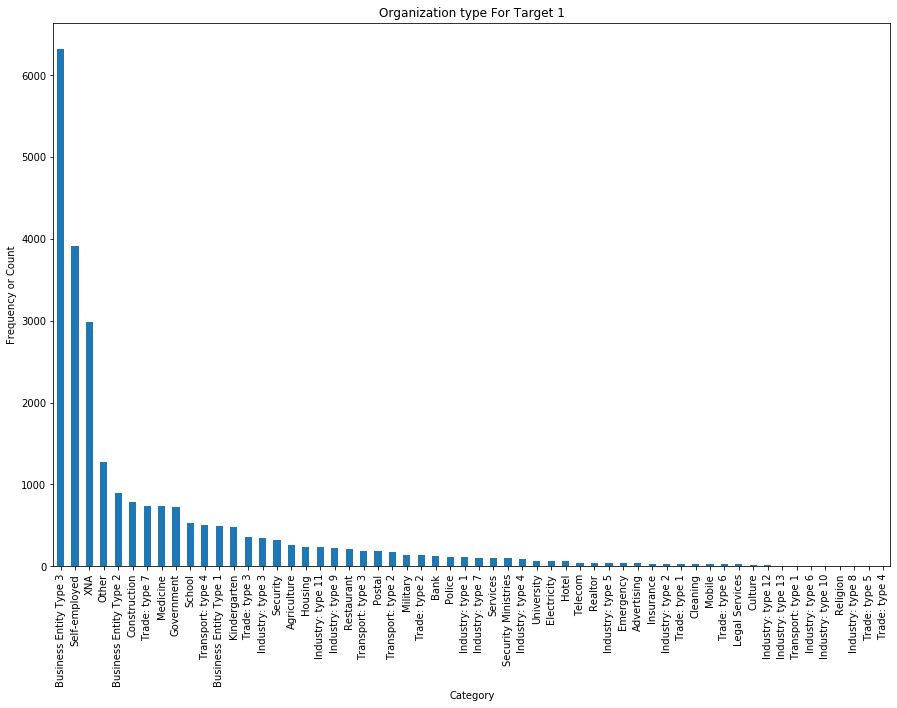

In [167]:
#now plotting graph frequncy of loan for'ORGANIZATION_TYPE with target 1
plt.figure(figsize = (15,10))
app_data_T1['ORGANIZATION_TYPE'].value_counts().plot('bar')
plt.title('Organization type For Target 1')
plt.xlabel('Category')
plt.ylabel('Frequency or Count')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\frequncy of loan application with target 1 .png')

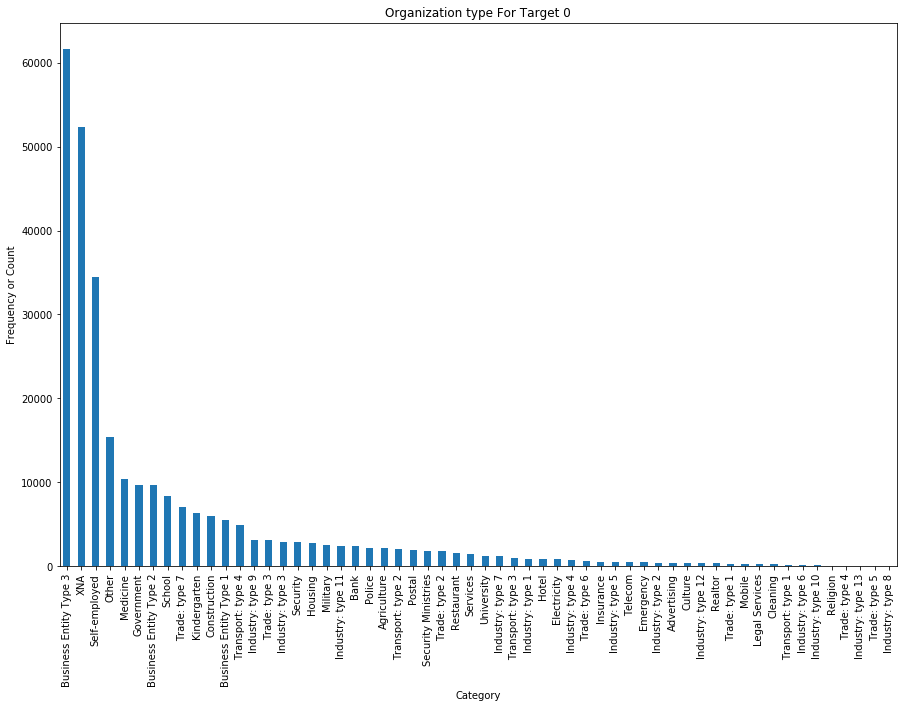

In [168]:
#now plotting graph frequncy of loan application with target =0
plt.figure(figsize= (15,10))
app_data_T0['ORGANIZATION_TYPE'].value_counts().plot('bar')
plt.title('Organization type For Target 0')
plt.xlabel('Category')
plt.ylabel('Frequency or Count')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\frequncy of loan application with target 0 .png')

In [169]:
# self-employed the customer can see here that has issue to paying the loan amount

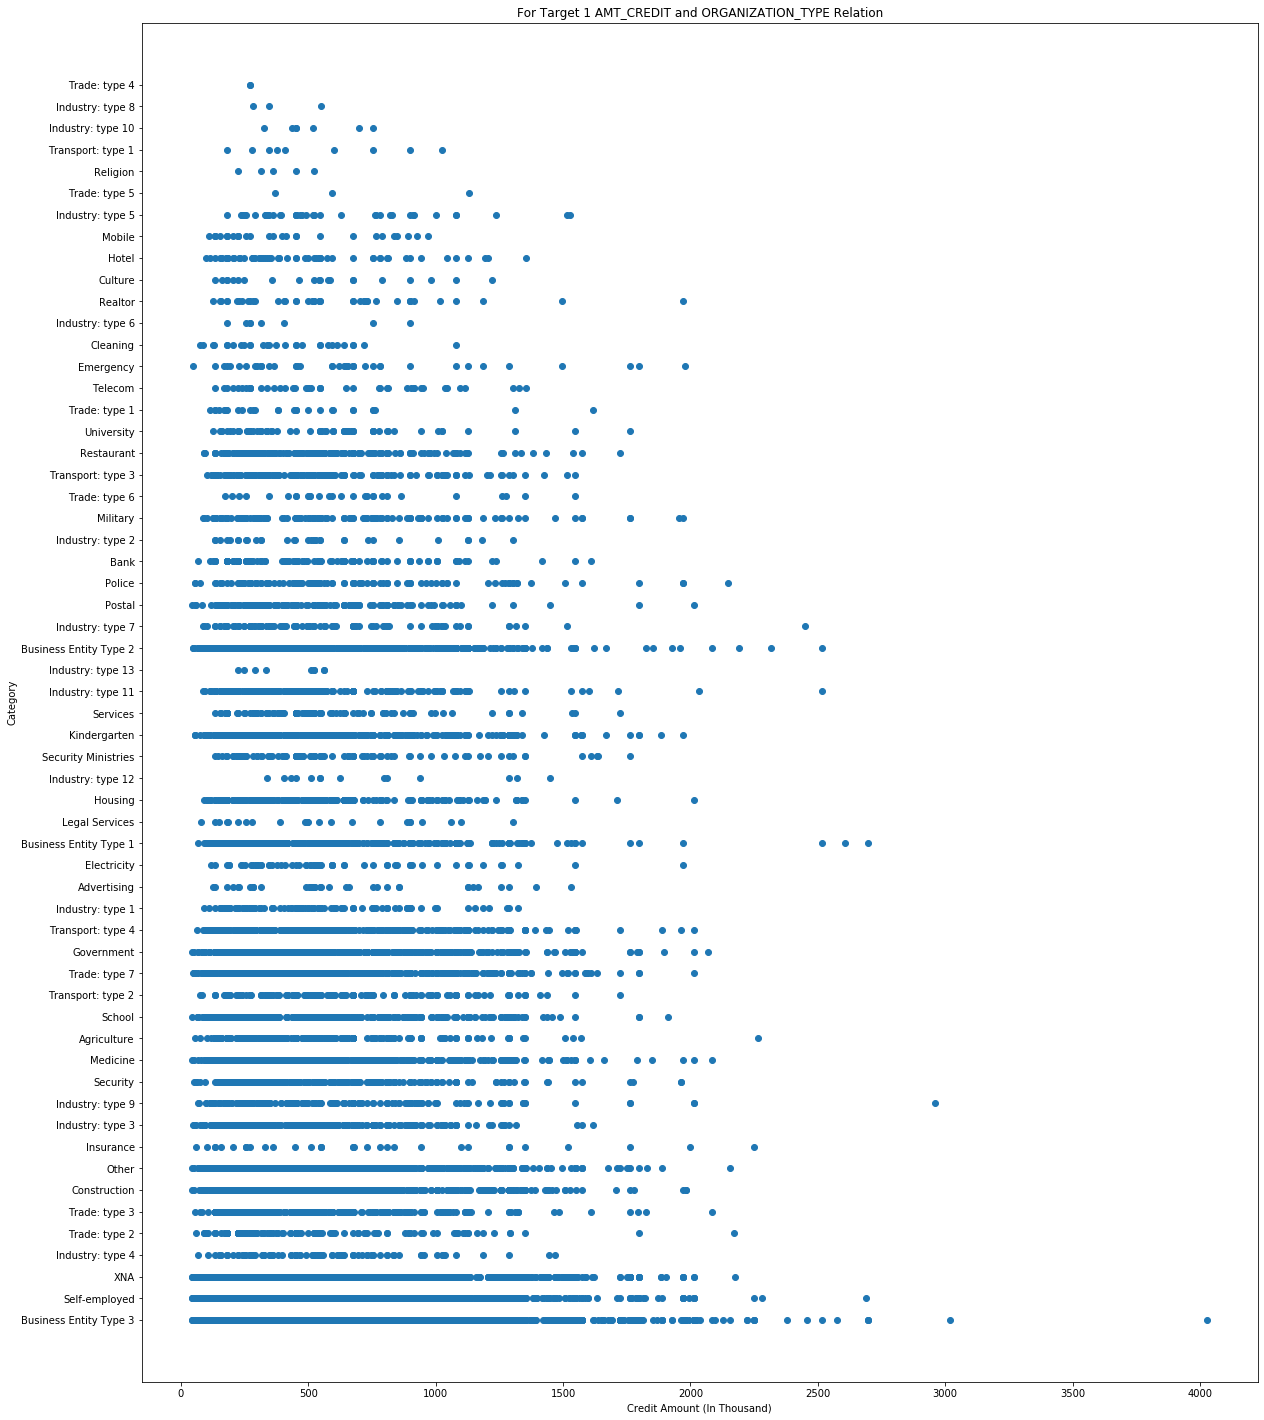

In [170]:
#This is Bivariate analysis for target 1 with 
plt.figure(figsize= (20,25))
plt.scatter(app_data_T1["AMT_CREDIT"]/1000, app_data_T1['ORGANIZATION_TYPE'])
plt.xlabel('Credit Amount (In Thousand)')
plt.ylabel('Category')
plt.title('For Target 1 AMT_CREDIT and ORGANIZATION_TYPE Relation')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Bivariate analysis for target= 1 ,AMT_CREDIT and ORGANIZATION_TYPE.png')

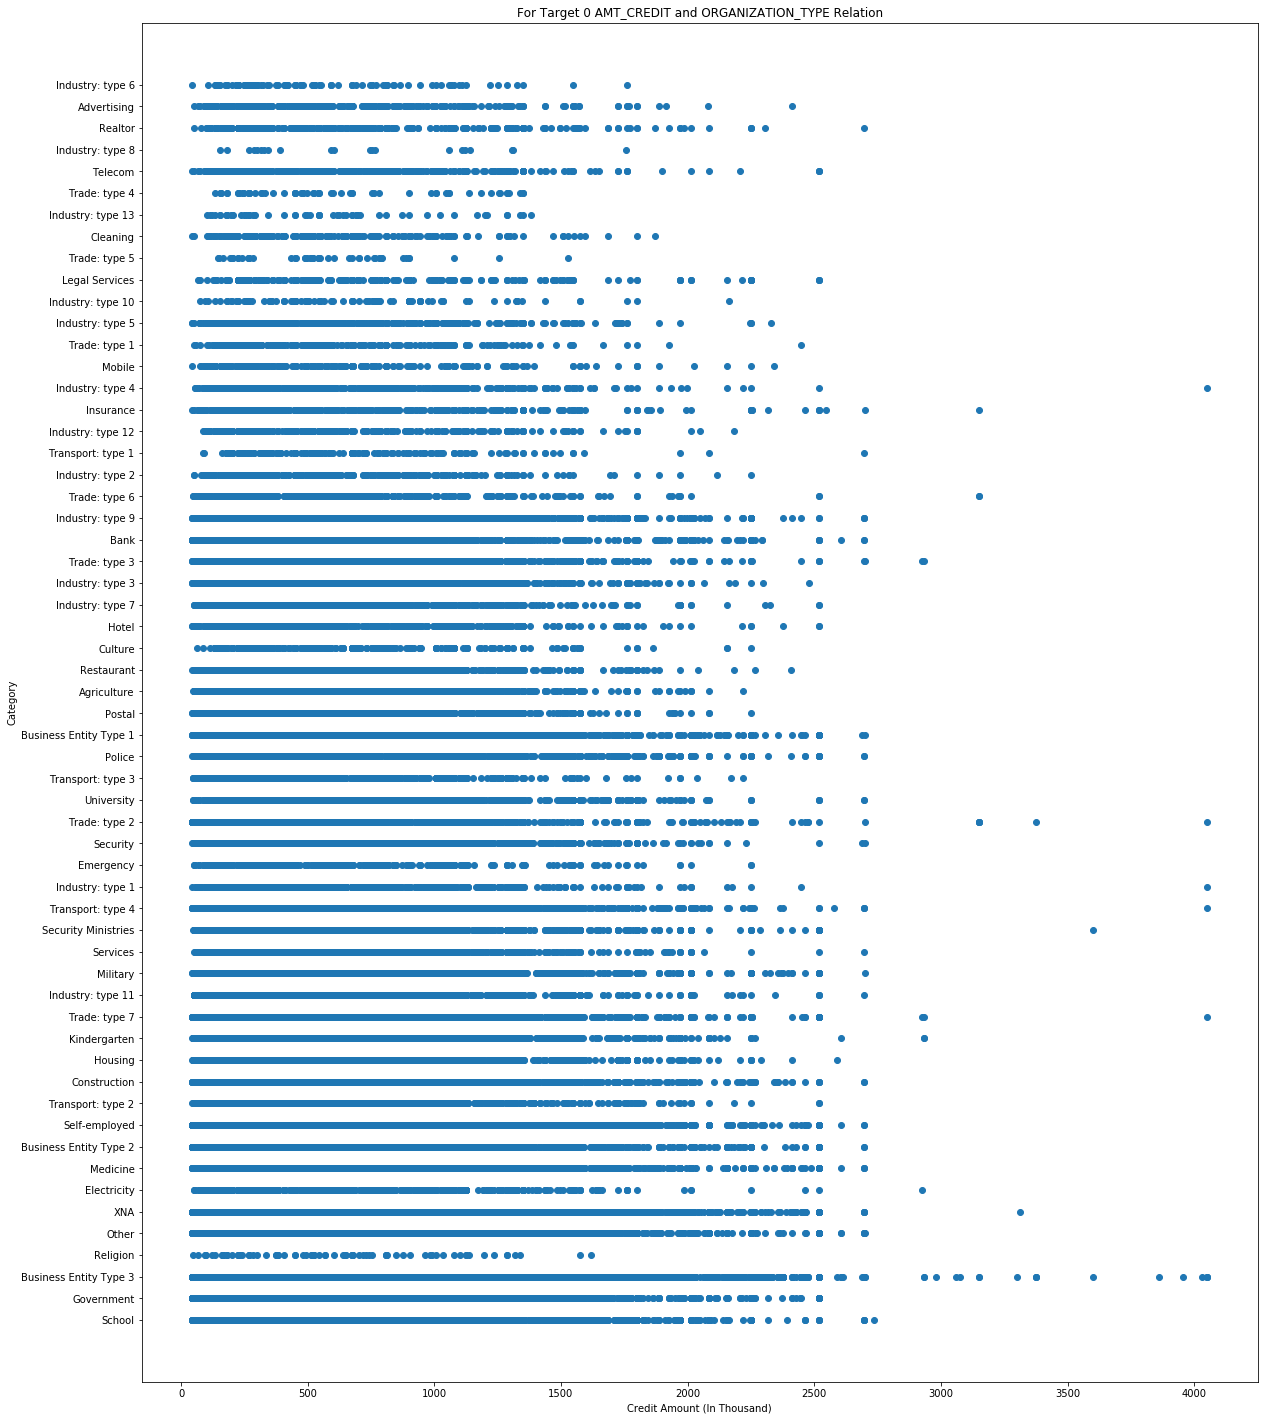

In [171]:
#This is Bivariate analysis for target 0
plt.figure(figsize= (20,25))
plt.scatter(app_data_T0["AMT_CREDIT"]/1000, app_data_T0['ORGANIZATION_TYPE'])
plt.xlabel('Credit Amount (In Thousand)')
plt.ylabel('Category')
plt.title('For Target 0 AMT_CREDIT and ORGANIZATION_TYPE Relation')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Bivariate analysis for target= 0 , AMT_CREDIT and ORGANIZATION_TYPE.png')

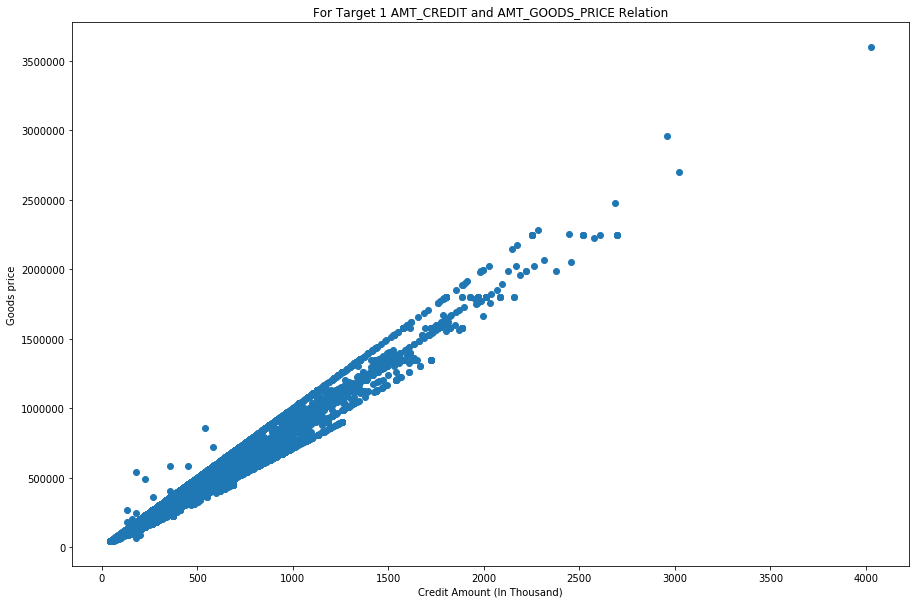

In [172]:
#This is Bivariate analysis for target= 1

plt.figure(figsize= (15,10))
plt.scatter(app_data_T1["AMT_CREDIT"]/1000, app_data_T1['AMT_GOODS_PRICE'])
plt.xlabel('Credit Amount (In Thousand)')
plt.ylabel('Goods price')
plt.title('For Target 1 AMT_CREDIT and AMT_GOODS_PRICE Relation')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\Bivariate analysis - AMT_CREDIT and AMT_GOODS_PRICE.png')

##### As can see the AMT_CREDIT and AMT_GOODS_PRICE are directly proportional

# Merge

In [173]:
# merging the both App and previous app data 
mer_data = pd.merge(app_data, pre_data, on='SK_ID_CURR', how='right')
pd.set_option('display.max_columns', None)
mer_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,1,1,0,1,1,0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,1,1,0,1,1,0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,1,1,0,1,1,0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0

In [174]:
#Check if the columns is categorical or continious also check if that coumns datatype is object and it should be float the reson mentioed here

for i in mer_data.columns:
    print(mer_data[i].value_counts())

187868    77
265681    73
173680    72
242412    68
206783    67
156367    66
389950    64
382179    64
198355    63
345161    62
446486    62
238250    61
280586    61
227585    60
206862    60
133023    60
242431    59
401563    59
235163    58
110899    58
205430    55
379932    55
303706    54
297331    54
336606    54
344403    54
426540    53
408214    52
189332    52
404929    52
          ..
102570     1
265187     1
100914     1
452318     1
148203     1
342816     1
386014     1
407647     1
448216     1
177507     1
373716     1
165221     1
429779     1
349705     1
345611     1
367569     1
158609     1
353807     1
191848     1
427730     1
193899     1
436301     1
434252     1
374293     1
421583     1
382489     1
426056     1
454726     1
380442     1
124145     1
Name: SK_ID_CURR, Length: 338857, dtype: int64
0    1291341
1     122360
Name: TARGET, dtype: int64
Cash loans         1307115
Revolving loans     106586
Name: NAME_CONTRACT_TYPE_x, dtype: int64
F      95513

-14890.0    235
-17873.0    228
-11991.0    227
-16721.0    222
-13480.0    219
-11459.0    215
-16830.0    215
-14122.0    211
-15044.0    206
-16754.0    204
-13966.0    203
-16257.0    203
-15761.0    203
-16677.0    201
-18976.0    201
-11135.0    200
-15816.0    199
-15073.0    199
-21684.0    199
-15629.0    196
-14797.0    195
-15517.0    195
-13788.0    195
-10978.0    194
-13706.0    194
-13749.0    193
-15653.0    193
-15675.0    192
-21897.0    192
-14568.0    191
           ... 
-16440.0      1
-24525.0      1
-24937.0      1
-7685.0       1
-24812.0      1
-8052.0       1
-7934.0       1
-7842.0       1
-7951.0       1
-25182.0      1
-7752.0       1
-25100.0      1
-8034.0       1
-7897.0       1
-24383.0      1
-7681.0       1
-7996.0       1
-25131.0      1
-7876.0       1
-7992.0       1
-7814.0       1
-23856.0      1
-7682.0       1
-25070.0      1
-7673.0       1
-7684.0       1
-7829.0       1
-7795.0       1
-25052.0      1
-7734.0       1
Name: DAYS_BIRTH, Length

0.285898    2820
0.262258    2026
0.265256    1697
0.265312    1568
0.159679    1442
0.266520    1294
0.263144    1135
0.162192    1124
0.162145    1106
0.163187     966
0.160405     879
0.191526     816
0.194266     780
0.245350     778
0.192316     688
0.354225     611
0.195354     597
0.194215     563
0.357282     533
0.255616     526
0.355126     516
0.341123     491
0.254760     407
0.344191     407
0.296144     400
0.293090     397
0.357342     387
0.297431     383
0.358568     376
0.153571     359
            ... 
0.137114       1
0.123081       1
0.150912       1
0.059247       1
0.048079       1
0.324840       1
0.744262       1
0.338704       1
0.164990       1
0.377866       1
0.213137       1
0.239220       1
0.108636       1
0.128589       1
0.254914       1
0.473834       1
0.151271       1
0.257150       1
0.381311       1
0.345624       1
0.746491       1
0.319064       1
0.159615       1
0.356700       1
0.297636       1
0.113506       1
0.706959       1
0.735419      

No     737033
Yes     11317
Name: EMERGENCYSTATE_MODE, dtype: int64
0.0      732938
1.0      221099
2.0      138230
3.0       96310
4.0       68036
5.0       47132
6.0       32976
7.0       23019
8.0       15296
9.0       11101
10.0       7568
11.0       4779
12.0       4011
13.0       2448
14.0       1555
15.0       1093
16.0        838
17.0        644
19.0        335
18.0        297
20.0        205
21.0        173
22.0        163
24.0         80
25.0         76
23.0         57
27.0         40
29.0         19
26.0         15
30.0         13
47.0          4
348.0         3
28.0          2
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64
0.0     1238905
1.0      137077
2.0       26062
3.0        6489
4.0        1658
5.0         289
6.0          66
7.0           4
34.0          3
8.0           2
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64
0.0      736227
1.0      221620
2.0      138208
3.0       95827
4.0       67237
5.0       46631
6.0       32517
7.0       22862
8.0       14807
9.0       

0.000          392402
45000.000       47831
225000.000      43543
135000.000      40678
450000.000      38905
90000.000       29367
180000.000      24738
270000.000      20573
675000.000      20227
67500.000       16861
900000.000      15556
112500.000      14378
315000.000      11920
229500.000      10756
337500.000      10539
360000.000      10284
157500.000      10222
1350000.000      8434
202500.000       7943
247500.000       7175
454500.000       7039
1129500.000      6928
540000.000       6843
1125000.000      6390
405000.000       5876
765000.000       5109
585000.000       4763
292500.000       3786
495000.000       3749
810000.000       3487
                ...  
266679.000          1
110241.900          1
266670.000          1
110246.400          1
266647.500          1
266643.000          1
266634.000          1
266796.000          1
45783.360           1
109954.350          1
84554.775           1
484387.965          1
45895.140           1
266931.000          1
266922.000

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

 365243.0    40645
-334.0         772
-509.0         760
-208.0         751
-330.0         750
-292.0         746
-691.0         745
-299.0         744
-270.0         744
-327.0         743
-320.0         741
-264.0         738
-313.0         737
-328.0         733
-698.0         731
-488.0         730
-271.0         730
-508.0         729
-298.0         726
-329.0         724
-322.0         715
-333.0         714
-325.0         708
-326.0         707
-361.0         706
-265.0         705
-418.0         705
-257.0         703
-324.0         703
-242.0         701
             ...  
-2855.0        138
-2866.0        138
-3.0           136
-2883.0        136
-2806.0        134
-4.0           132
-2875.0        130
-2876.0        130
-2878.0        130
-2869.0        129
-2873.0        129
-2881.0        129
-2863.0        128
-2877.0        127
-2880.0        127
-2871.0        126
-2857.0        122
-2885.0        121
-2882.0        120
-2872.0        117
-2884.0        113
-2879.0     

In [175]:
## Unique values per column
mer_data.nunique().sort_values().head(50)

FLAG_MOBIL                     1
FLAG_DOCUMENT_5                2
LIVE_REGION_NOT_WORK_REGION    2
REG_CITY_NOT_LIVE_CITY         2
REG_CITY_NOT_WORK_CITY         2
LIVE_CITY_NOT_WORK_CITY        2
EMERGENCYSTATE_MODE            2
FLAG_DOCUMENT_2                2
FLAG_DOCUMENT_3                2
FLAG_DOCUMENT_4                2
FLAG_DOCUMENT_6                2
FLAG_DOCUMENT_7                2
FLAG_DOCUMENT_8                2
FLAG_DOCUMENT_9                2
FLAG_DOCUMENT_10               2
FLAG_DOCUMENT_11               2
FLAG_DOCUMENT_12               2
FLAG_DOCUMENT_13               2
FLAG_DOCUMENT_14               2
FLAG_DOCUMENT_15               2
FLAG_DOCUMENT_16               2
FLAG_DOCUMENT_17               2
FLAG_DOCUMENT_18               2
FLAG_DOCUMENT_19               2
FLAG_DOCUMENT_20               2
FLAG_DOCUMENT_21               2
FLAG_LAST_APPL_PER_CONTRACT    2
NFLAG_LAST_APPL_IN_DAY         2
REG_REGION_NOT_WORK_REGION     2
REG_REGION_NOT_LIVE_REGION     2
NFLAG_INSU

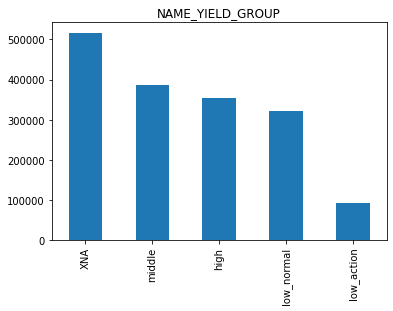

In [176]:
# plotted the count plot for NAME_YIELD_GROUP
mer_data['NAME_YIELD_GROUP'].value_counts().plot('bar')
plt.title('NAME_YIELD_GROUP')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\NAME_YIELD_GROUP count plot.png')

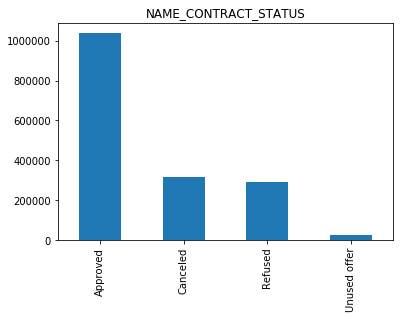

In [177]:
# plotted the count plot for NAME_CONTRACT_STATUS
mer_data['NAME_CONTRACT_STATUS'].value_counts().plot('bar')
plt.title('NAME_CONTRACT_STATUS')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\NAME_CONTRACT_STATUS count plot.png')

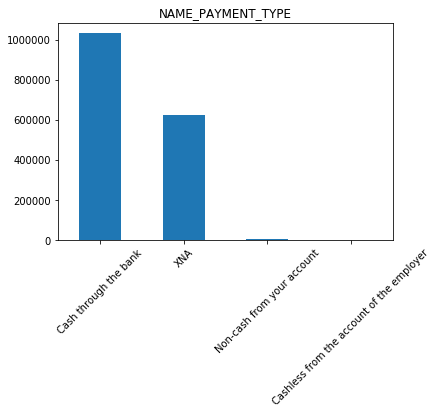

In [178]:
# plotted the count plot for NAME_PAYMENT_TYPE
mer_data['NAME_PAYMENT_TYPE'].value_counts().plot('bar')
plt.title('NAME_PAYMENT_TYPE')
plt.xticks(rotation = 45)
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\NAME_PAYMENT_TYPE count plot.png')

In [ ]:
## Unique values per column
mer_data.nunique().sort_values().tail(50)

In [ ]:
# now we will do bi-variate on the AMT_GOODS_PRICE_y and AMT_CREDIT_y.

plt.scatter(mer_data["AMT_CREDIT_y"]/1000, mer_data["AMT_GOODS_PRICE_y"]/100000)
plt.xlabel('Rredit Amount (In Thousand)')
plt.ylabel('Total Income (In Lac)')
plt.title('From both dataset AMT_CREDIT and AMT_GOODS_PRICE Relation')
plt.savefig(r'C:\Users\Admin\Downloads\Credit EDA Case Study\Graphs\bi-varite_Analysis for AMT_CREDIT_y and AMT_GOODS_PRICE_y .png')


# Thank you :)